## Importing Modules

In [2]:
# Import Pandas 
import pandas as pd
# Import numpy 
import numpy as np
# Import Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
from pandas.core import  datetools
from statsmodels.graphics import tsaplots
from pylab import rcParams
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau

### Explore the Jobs dataset

DataFrame, which contains the unemployment rate of different industries in the USA during the years of 2000-2010. As you will see, the dataset contains time series for 16 industries and across 122 timepoints (one per month for 10 years). In general, the typical workflow of a Data Science project will involve data cleaning and exploration, so we will begin by reading in the data and checking for missing values.

In [4]:
# Read in jobs file
jobs = pd.read_csv("employment.csv")

# Print first five lines of your DataFrame
print(jobs.head(5))

# Check the type of each column in your DataFrame
print(jobs.dtypes)

# Convert datestamp column to a datetime object
jobs['datestamp'] = pd.to_datetime(jobs['datestamp'])

# Set the datestamp columns as the index of your DataFrame
jobs = jobs.set_index('datestamp')

# Check the number of missing values in each column
print(jobs.isnull().sum())

    datestamp  Agriculture  Business services  Construction  \
0  2000-01-01         10.3                5.7           9.7   
1  2000-02-01         11.5                5.2          10.6   
2  2000-03-01         10.4                5.4           8.7   
3  2000-04-01          8.9                4.5           5.8   
4  2000-05-01          5.1                4.7           5.0   

   Durable goods manufacturing  Education and Health  Finance  Government  \
0                          3.2                   2.3      2.7         2.1   
1                          2.9                   2.2      2.8         2.0   
2                          2.8                   2.5      2.6         1.5   
3                          3.4                   2.1      2.3         1.3   
4                          3.4                   2.7      2.2         1.9   

   Information  Leisure and hospitality  Manufacturing  Mining and Extraction  \
0          3.4                      7.5            3.6                    3.9

### Describe time series data with boxplots

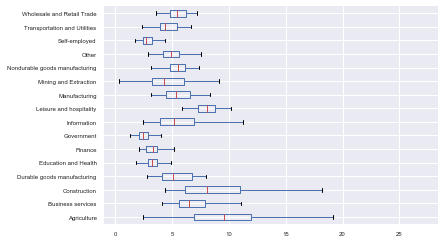

       Agriculture  Business services  Construction  \
count   122.000000         122.000000    122.000000   
mean      9.840984           6.919672      9.426230   
std       3.962067           1.862534      4.587619   
min       2.400000           4.100000      4.400000   
25%       6.900000           5.600000      6.100000   
50%       9.600000           6.450000      8.100000   
75%      11.950000           7.875000     10.975000   
max      21.300000          12.000000     27.100000   

       Durable goods manufacturing  Education and Health     Finance  \
count                   122.000000            122.000000  122.000000   
mean                      6.025410              3.420492    3.540164   
std                       2.854475              0.877538    1.235405   
min                       2.800000              1.800000    2.100000   
25%                       4.125000              2.900000    2.700000   
50%                       5.100000              3.200000    3.300000   


In [5]:
# Generate a boxplot
jobs.boxplot(fontsize=6, vert=False)
plt.show()

# Generate numerical summaries
print(jobs.describe())

# Print the name of the time series with the highest mean
print('Agriculture')

# Print the name of the time series with the highest variability
print('Construction')

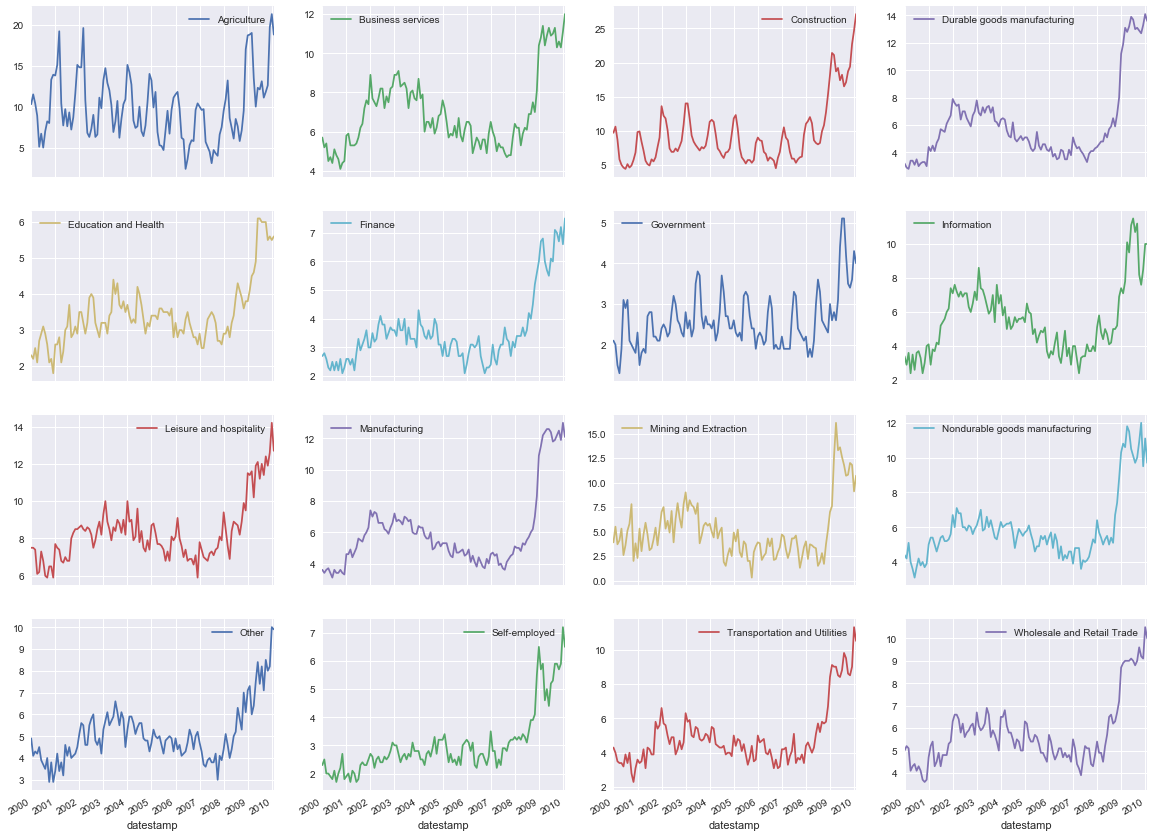

In [6]:
jobs.plot(subplots=True,
         layout= (4,4),
         figsize=(20,16),
         sharex=True,
         sharey=False)
plt.show()

### Annotating event jobs in Dataset

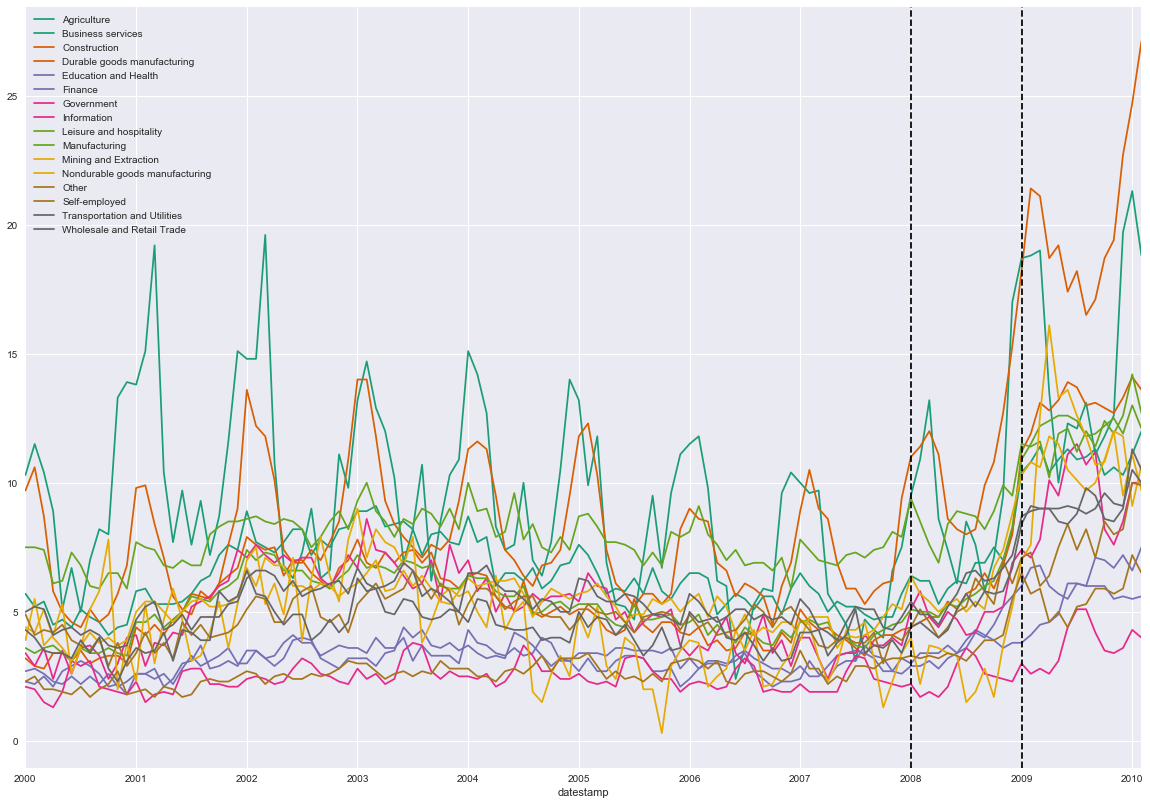

In [7]:
ax = jobs.plot(figsize=(20,14),colormap='Dark2')

ax.axvline('2008-01-01',color='black',linestyle='--')
ax.axvline('2009-01-01',color='black',linestyle='--')

plt.show()

In [8]:
print(jobs.index)

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01', '2009-11-01', '2009-12-01',
               '2010-01-01', '2010-02-01'],
              dtype='datetime64[ns]', name='datestamp', length=122, freq=None)


In [9]:
index_month = jobs.index.month

In [10]:
job_by_month = jobs.groupby(index_month).mean()
print(job_by_month)

           Agriculture  Business services  Construction  \
datestamp                                                 
1            13.763636           7.863636     12.909091   
2            13.645455           7.645455     13.600000   
3            13.830000           7.130000     11.290000   
4             9.130000           6.270000      9.450000   
5             7.100000           6.600000      8.120000   
6             6.770000           6.720000      7.430000   
7             7.010000           6.740000      7.350000   
8             8.080000           6.570000      7.300000   
9             7.090000           6.790000      7.560000   
10            7.490000           6.710000      7.840000   
11           10.470000           6.750000      8.700000   
12           12.940000           7.080000     10.800000   

           Durable goods manufacturing  Education and Health   Finance  \
datestamp                                                                
1                        

### Monthly averages in the jobs

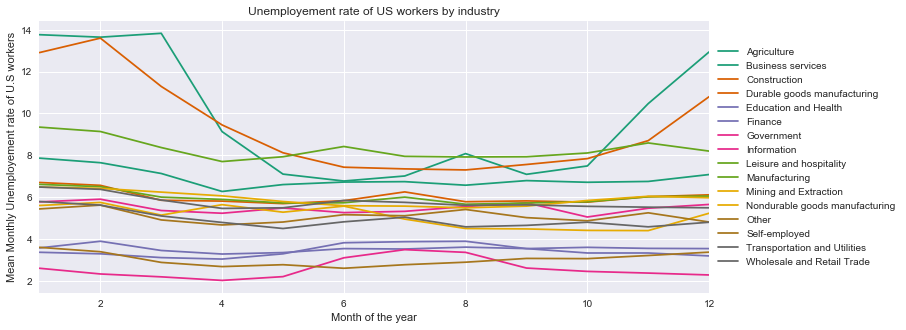

In [15]:
ax = job_by_month.plot(figsize=(12,5),colormap='Dark2')
ax.legend(bbox_to_anchor=(1.0,0.5),loc='center left')
plt.xlabel("Month of the year")
plt.ylabel("Mean Monthly Unemployement rate of U.S workers")
plt.title("Unemployement rate of US workers by industry")
plt.show()

            Finance  Information  Manufacturing  Construction
datestamp                                                    
2000-01-01      2.7          3.4            3.6           9.7
2000-02-01      2.8          2.9            3.4          10.6
2000-03-01      2.6          3.6            3.6           8.7
2000-04-01      2.3          2.4            3.7           5.8
2000-05-01      2.2          3.5            3.4           5.0


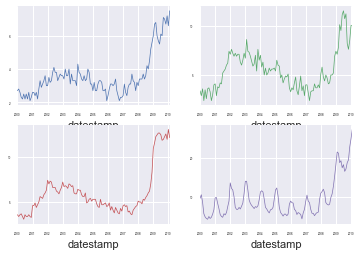

In [16]:
# A subset of the jobs DataFrame
jobs_subset = jobs[['Finance', 'Information', 'Manufacturing', 'Construction']]

# Print the first 5 rows of jobs_subset
print(jobs_subset.head(5))

# Create a facetted graph with 2 rows and 2 columns
ax = jobs_subset.plot(subplots=True,
                      layout=(2, 2),
                      sharex=False,
                      sharey=False,
                      linewidth=0.7,
                      fontsize=3,
                      legend=False)

plt.show()

### Annotate significant events in time series data

DataFrame, you observed a distinct increase in unemployment rates during 2001 and 2008. In general, time series plots can be made even more informative if you include additional annotations that emphasize specific observations or events. This allows you to quickly highlight parts of the graph to viewers, and can help infer what may have caused a specific event.

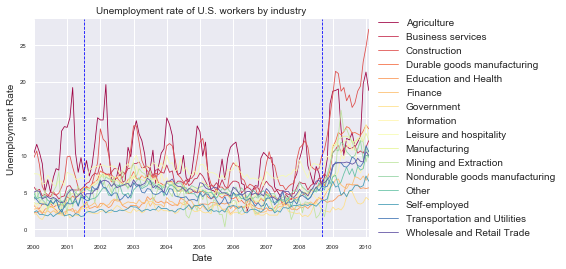

In [17]:
# Plot all time series in the jobs DataFrame
ax = jobs.plot(colormap='Spectral', fontsize=6, linewidth=0.8)

# Set labels and legend
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('Unemployment Rate', fontsize=10)
ax.set_title('Unemployment rate of U.S. workers by industry', fontsize=10)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Annotate your plots with vertical lines
ax.axvline('2001-07-01', color='blue', linestyle='--', linewidth=0.8)
ax.axvline('2008-09-01', color='blue', linestyle='--', linewidth=0.8)

# Show plot
plt.show()

### Plot monthly and yearly trends
 it is possible to directly extract the day, month or year of each date in the index. As a reminder, you can extract the year of each date in the index using the .index.year attribute. You can then use the .groupby() and .mean() methods to compute the mean annual value of each time series in your DataFrame:
 it is possible to directly extract the day, month or year of each date in the index. As a reminder, you can extract the year of each date in the index using the .index.year attribute. You can then use the .groupby() and .mean() methods to compute the mean annual value of each time series in your DataFrame:

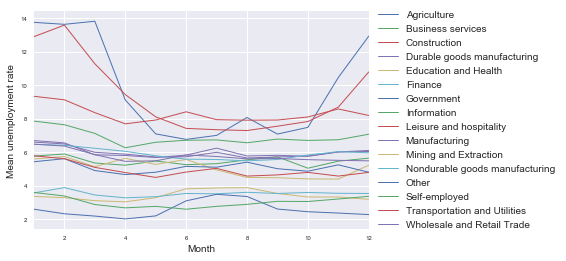

In [21]:
# Extract the month from the index of jobs
index_month = jobs.index.month

# Compute the mean unemployment rate for each month
jobs_by_month = jobs.groupby(index_month).mean()

# Plot the mean unemployment rate for each month
ax = jobs_by_month.plot(fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

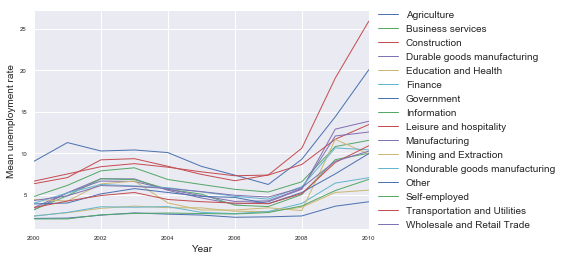

In [27]:
# Extract of the year in each date indices of the jobs DataFrame
index_year = jobs.index.year

# Compute the mean unemployment rate for each year
jobs_by_year = jobs.groupby(index_year).mean()

# Plot the mean unemployment rate for each year
ax = jobs_by_year.plot(fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [28]:
# Initialize dictionary
jobs_decomp = {}

# Get the names of each time series in the DataFrame
jobs_names = jobs.columns

# Run time series decomposition on each time series of the DataFrame
for ts in jobs_names:
    ts_decomposition = sm.tsa.seasonal_decompose(jobs[ts])
    jobs_decomp[ts] = ts_decomposition

### Visualize the seasonality of multiple time series

extract the seasonality component of jobs_decomp to visualize the seasonality in these time series. Note that before plotting, you will have to convert the dictionary of seasonality components into a DataFrame using the pd.DataFrame.from_dict() function.

An empty dictionary jobs_seasonal and the time series decompisiton object jobs_decomp from the previous exercise are available in your workspace.

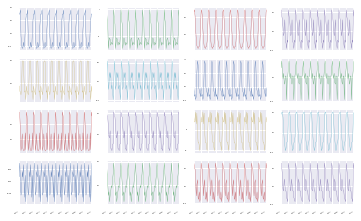

In [30]:
jobs_seasonal = {}
# Extract the seasonal values for the decomposition of each time series
for ts in jobs_names:
    jobs_seasonal[ts] = jobs_decomp[ts].seasonal
    
# Create a DataFrame from the jobs_seasonal dictionnary
seasonality_df = pd.DataFrame.from_dict(jobs_seasonal)

# Remove the label for the index
seasonality_df.index.name = None

# Create a faceted plot of the seasonality_df DataFrame
seasonality_df.plot(subplots=True,
                   layout=(4, 4),
                   sharey=False,
                   fontsize=2,
                   linewidth=0.3,
                   legend=False)

# Show plot
plt.show()

### Plotting a clustermap of jobs correlation matrix

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


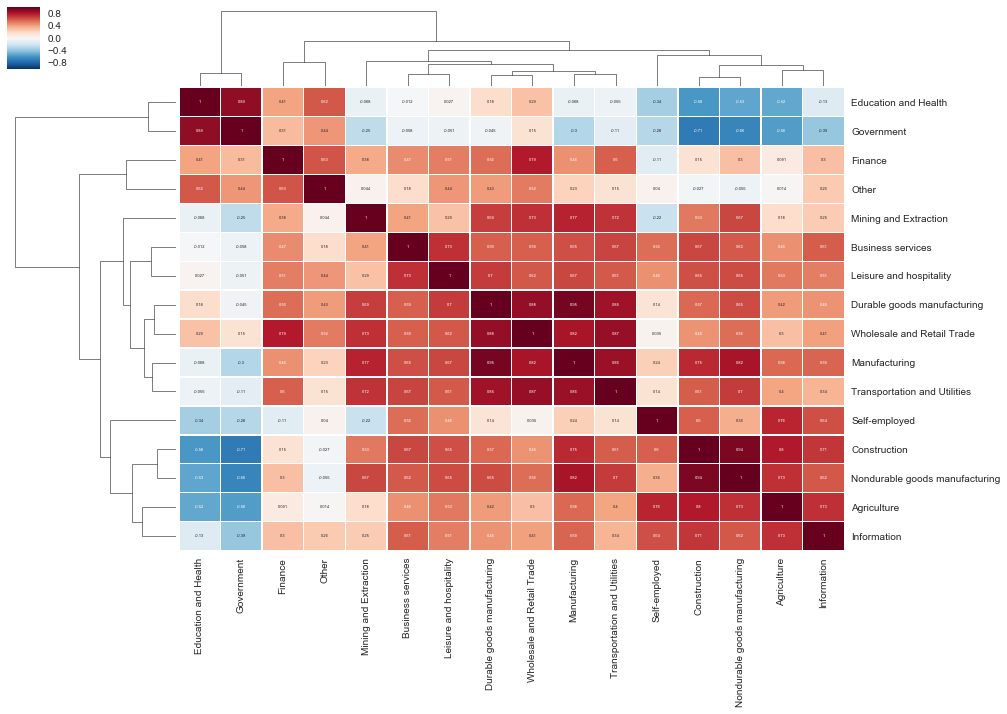

0.89


In [32]:
# Get correlation matrix of the seasonality_df DataFrame
seasonality_corr = seasonality_df.corr(method='spearman')

# Customize the clustermap of the seasonality_corr correlation matrix
fig = sns.clustermap(seasonality_corr, annot=True, annot_kws={"size": 4}, linewidths=.4, figsize=(15, 10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()

# Print the correlation between the seasonalities of the Government and Education & Health industries
print(0.89)